In [7]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch

# import shapefile using geopandas
dh_plot_locations = gpd.read_file('data/ruimtelijke_kengetallen2019/ruimtelijke_kengetallen2019.shp')

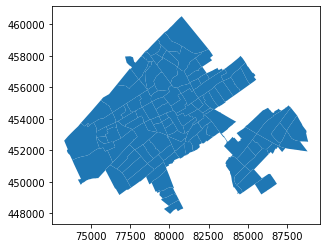

In [8]:
dh_plot_locations.plot()